
{{% alert warning %}}It is recommended to read the tutorial on [using pyDSA on a single image](../pydsa/index.html) before doing this tutorial.{{% /alert %}}

This tutorial presents how to use pyDSA to analyze videos of drops. 
The video used is a side-view of a drop during an inflation-deflation sequence.

## Importing a video

Importing works in the same way than for an image.


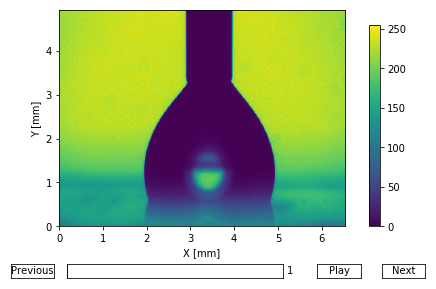

In [1]:
import pyDSA as dsa   
import matplotlib.pyplot as plt

# Import an image
ims = dsa.import_from_video('data/video.mp4',
                            dx=1/120, dy=1/120, dt=1/10,
                            unit_x='mm', unit_y='mm', unit_t='s',
                            incr=10)
# Display
ims.display()
plt.show()

## Detecting the edges and contact angles

The method is similar than for a single image: we set the baseline, detect the edges, fit the edges, and compute the contact angles.

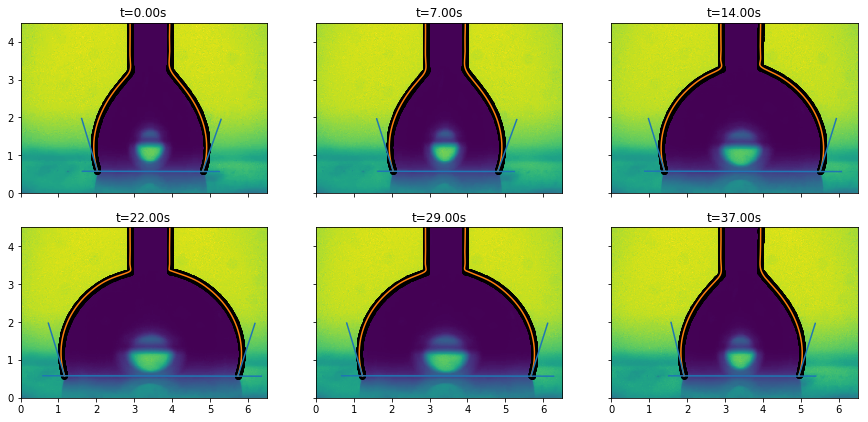

In [2]:
ims.set_baseline([0.0, 0.583],
                 [6.492, 0.57])
edges = ims.edge_detection()
edges.fit(s=0.01)
edges.compute_contact_angle()

# Display
fig, axs = plt.subplots(2, 3, figsize=(15, 6.9), sharex=True, sharey=True)
for i, ax in enumerate(axs.flat):
    plt.sca(ax)
    ind = int(i/5*(len(ims) - 1))
    ims[ind]._display()
    edges[ind].display()
    plt.xlabel('')
    plt.ylabel('')
    plt.title('t={:.2f}s'.format(ims.times[ind]))
plt.xlim(0, 6.5)
plt.ylim(0, 4.5)
plt.show()

## Plotting the drop properties evolution

We can then display a summary of the drop properties evolution.
The following function will display:
- the evolution of the drop edge contact with the surface (blue and yellow in the first figure)
- the evolution of the drop base length (green in the first figure)
- the evolution of the contact angles (blue and yellow in the second figure)

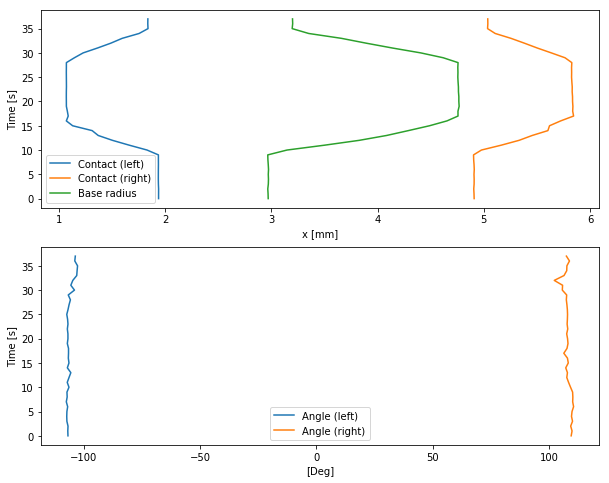

In [3]:
edges.display_summary(figsize=(10, 8))
plt.show()

## Accessing the drop properties

We can also extract the numeric values of those properties, 
if we want to do further processing on them.

{{% alert info %}}Angles are defined in the trigonometric sens, from the horizontal line.{{% /alert %}}

In [4]:
thetas, thetas_t = edges.get_contact_angles()
print("=== Left contact angle: ===")
print(thetas[:, 0])
print("\n=== Right contact angle: ===")
print(thetas[:, 1])

radius = edges.get_drop_base()
print("\n=== Drop contact positions: ===")
print(radius)

=== Left contact angle: ===
[106.82124177 106.89153104 106.80195249 107.28297574 107.34363505
 107.27784188 106.95177242 107.53012718 107.16280456 107.25262441
 106.38800189 107.13128785 106.37357963 105.5870764  107.08325183
 106.39480128 106.66051429 106.58224643 106.58062816 107.08964047
 106.82985203 106.83611945 107.08110645 106.82104733 106.98000331
 107.32906465 106.79129417 106.34451226 105.77145275 106.69374328
 104.02426232 105.5866148  104.74019582 103.04931016 102.88969475
 102.69842583 103.88329765 103.66657388]

=== Right contact angle: ===
[70.49951834 70.1299055  70.71083382 69.92671529 70.36612862 70.14270695
 69.46986584 69.85713422 69.7853119  69.89271411 70.77508121 71.62557837
 72.39170002 72.11318111 72.83302367 71.75478947 72.11059154 73.66624147
 72.29808509 71.87726432 72.05937138 72.42824549 71.98435316 72.24383613
 72.13157375 72.0712229  72.14669981 72.33741789 72.5867288  72.44292541
 74.31487733 74.20368009 77.78053316 73.58388048 72.41755972 72.34645656
 